## Bibliotecas y funciones



Primero cargamos las bibliotecas de Python que vamos a necesitar y definimos algunas funciones. Usamos la biblioteca estándar `csv`, las bibliotecas `numpy`, `pandas`, `matplotlib` y `networkx`, así como la biblioteca de creación propia `pycliques`.

La función `graph_from_csv` tiene como argumento un archivo `.csv` y regresa una gráfica con pesos, donde los nodos se llaman como las columnas y renglones del archivo `.csv`.

La función `selected_graph` tiene tres argumentos (el tercer argumento es opcional). El primer argumento es una gráfica `G` donde las aristas tienen pesos (como las que retorna la función `graph_from_csv`), el segundo argumento es un número real `p` y el tercer argumento es `True` o `False`. Si el tercer argumento es `True` (el valor por defecto), la función regresa la subgráfica de `G` con las aristas cuyo peso es **mayor** que `p`.  Si el valor del tercer argumento es `False`,  entonces se seleccionan aristas con peso **menor** que `p`.

La función `dict_of_selected_graphs` tiene tres argumentos  (el tercer argumento es opcional). El primer argumento es una gráfica `G` donde las aristas tienen pesos (como las que retorna la función `graph_from_csv`), el segundo argumento es un número natural `n`, y el tercer argumento es `True` or `False`. Se retorna un diccionario de gráficas obtenidas con `selected_graph`, cuyos parámetros `p` son las claves del diccionario, y son los números $0,\frac{1}{n},\frac{2}{n},\ldots,\frac{n-1}{n},1$ (en decimal). El tercer argumento es el que se le envía como tercer argumento a `selected_graph`.

La función `dict_of_pared_graphs` es como la función  `dict_of_selected_graphs`, pero ahora se tienen gráficas a las que se quitan todos los vértices dominados (lo cual disminuye la cantidad de vértices sin alterar el tipo de homotopía). El proceso de quitar vértices dominados se llama *podar la gráfica.*

-   estudiar el valor Fiedler
-   estudiar el parámetro donde se pierde conexidad.



In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import csv

from itertools import combinations
from random import random

from pycliques.simplicial import *
from pycliques.dominated import *

def graph_from_csv(filename):
    df = pd.read_csv(filename, index_col=0)
    return nx.from_pandas_adjacency(df)

def selected_graph(graph, param, bigger_than=True):
    vs = list(graph.nodes())
    n = graph.order()
    out = nx.Graph()
    out.add_nodes_from(vs)
    if bigger_than:
        out.add_edges_from([(vs[i], vs[j]) for i in range(n) for j in range(n) if i != j
                            and graph[vs[i]][vs[j]]['weight'] > param])
    else:
        out.add_edges_from([(vs[i], vs[j]) for i in range(n) for j in range(n) if i != j
                            and graph[vs[i]][vs[j]]['weight'] < param])
    return out

def dict_of_selected_graphs(graph, num_params, bigger=True):
    pars = np.linspace(0, 1, num_params+1)
    return {par: selected_graph(graph, par, bigger) for par in pars}

def dict_of_pared_graphs(graph, num_params, bigger=True):
    pars = np.linspace(0, 1, num_params+1)
    return {par: completely_pared_graph(selected_graph(graph, par, bigger)) for par in pars}

all_nodes = ['C3', 'C4', 'CZ', 'EMG', 'F3', 'F4', 'F7', 'F8', 'FP1', 'FP2', 'FZ', 'LOG', 'O1', 'O2', 'P3', 'P4', 'PZ', 'ROG', 'T3', 'T4', 'T5', 'T6']

def random_weighted_graph(the_nodes):
    G = nx.Graph()
    G.add_nodes_from(the_nodes)
    all_edges = combinations(the_nodes, 2)
    elist = [(e[0], e[1], random()) for e in all_edges]
    G.add_weighted_edges_from(elist)
    return G

def the_complexity(graph, num_params):
    dict_of_graphs = dict_of_pared_graphs(graph, num_params)
    the_data = [dict_of_graphs[i].order() - len(list(nx.connected_components(dict_of_graphs[i]))) for i in dict_of_graphs.keys()] 
    return sum(the_data)/len(dict_of_graphs.keys())

## Resultados



| datos|complejidad sueño REM||
|---|---|---|
| AEFP|0.104|deterioro leve|
| CLMN|0.440|deterioro leve|
| EMNN|0.498||
| FGH|0.009||
| GH|0.039||
| GURM|0.196||
| JANA|0.005||
| JGMN|0||
| MGNA|0.006||
| MJNN|0.301||
| PCM|1.092||
| RLMN|0.261||
| RRMN|0.174||
| VCNN|0.026||
|---|---|---|
| G1|12.896||
| G2|14.574||
| G3|14.848||



## AEFP



Primero cargamos la gráfica con pesos y dibujamos una gráfica.



In [1]:
G_AEFP = graph_from_csv('./variaciones/correls_AEFP.csv')
nx.draw_circular(selected_graph(G_AEFP, 0.75), with_labels=True)

De la siguiente manera averiguamos el peso de una arista:



In [1]:
G_AEFP['C3']['C4']

Formamos un diccionario de gráficas podadas y comparamos su orden con la cantidad de componentes conexas. Cuando ambos números son diferentes, sabemos que hay una componente no trivial.



In [1]:
the_dict = dict_of_pared_graphs(G_AEFP, 100)
{i: (the_dict[i].order(), len(list(nx.connected_components(the_dict[i])))) for i in the_dict.keys()}

En 0.93 ocurre un primer ciclo no trivial, que persiste en varios parámetros.



In [1]:
nx.draw(the_dict[0.93], with_labels=True)

In [1]:
nx.draw(the_dict[0.9400000000000001], with_labels=True)

In [1]:
nx.draw(the_dict[0.9500000000000001], with_labels=True)

In [1]:
the_complexity(G_AEFP, 100)

In [1]:
the_complexity(G_AEFP, 200)

In [1]:
the_complexity(G_AEFP, 300)

In [1]:
the_complexity(G_AEFP, 400)

In [1]:
the_complexity(G_AEFP, 500)

In [1]:
the_complexity(G_AEFP, 600)

In [1]:
the_complexity(G_AEFP, 700)

In [1]:
the_complexity(G_AEFP, 800)

In [1]:
the_complexity(G_AEFP, 900)

In [1]:
the_complexity(G_AEFP, 1000)

In [1]:
the_complexity(G_AEFP, 2000)

In [1]:
the_complexity(G_AEFP, 3000)

In [1]:
the_complexity(G_AEFP, 4000)

In [1]:
the_complexity(G_AEFP, 5000)

In [1]:
the_complexity(G_AEFP, 6000)

In [1]:
the_complexity(G_AEFP, 10000)

## CLMN



In [1]:
G_CLMN = graph_from_csv('./variaciones/correls_CLMN.csv')
nx.draw_circular(selected_graph(G_CLMN, 0.75), with_labels=True)

In [1]:
the_dict = dict_of_pared_graphs(G_CLMN, 100)
{i: (the_dict[i].order(), len(list(nx.connected_components(the_dict[i])))) for i in the_dict.keys()}

En este caso se obtiene un ciclo no trivial en 0.65:



In [1]:
nx.draw(the_dict[0.65], with_labels=True)

En el caso del parámetro 0.66 se obtiene una componente no trivial.



In [1]:
nx.draw(the_dict[0.66], with_labels=True)

Vamos a examinar detalladamente la componente no trivial.



In [1]:
G = the_dict[0.66]
cc=list(nx.connected_components(G))
H = G.subgraph(cc[0])
nx.draw(H, with_labels=True)

Aquí usamos una función del paquete `pycliques`, que utiliza teoría discreta de Morse para averiguar información sobre el tipo de homotopía de una gráfica.



In [1]:
clique_complex(H).dong_matching()

Esto dice que la gráfica es homotópica a un complejo CW con una celda de dimensión 0, una de dimensión 1 y una de dimensión 2. Para garantizar que es una cuña de una circunferencia y una esfera, se deshace una circunferencia eliminando el vértice 'FP2'.



In [1]:
lista = list(H.nodes())
lista.remove('FP2')
# H.subgraph gives a 'frozen' graph
sH = nx.Graph(H.subgraph(lista))
psH = completely_pared_graph(sH)
nx.draw(psH, with_labels=True)

Algo similar ocurre con el parámetro 0.67.



In [1]:
nx.draw(the_dict[0.67], with_labels=True)

In [1]:
G = the_dict[0.67]
cc=list(nx.connected_components(G))
H = G.subgraph(cc[0])
nx.draw(H, with_labels=True)

In [1]:
lista = list(H.nodes())
lista.remove('FP2')
# H.subgraph gives a 'frozen' graph
sH = nx.Graph(H.subgraph(lista))
psH = completely_pared_graph(sH)
nx.draw(psH, with_labels=True)

In [1]:
nx.draw(the_dict[0.68], with_labels=True)

In [1]:
nx.draw(the_dict[0.6900000000000001], with_labels=True)

In [1]:
nx.draw(the_dict[0.71], with_labels=True)

In [1]:
nx.draw(the_dict[0.8], with_labels=True)

In [1]:
the_complexity(G_CLMN, 10000)

## EMNN



In [1]:
G_EMNN = graph_from_csv('./variaciones/correls_EMNN.csv')
nx.draw_circular(selected_graph(G_EMNN, 0.75), with_labels=True)

In [1]:
the_dict = dict_of_pared_graphs(G_EMNN, 100)
{i: (the_dict[i].order(), len(list(nx.connected_components(the_dict[i])))) for i in the_dict.keys()}

In [1]:
nx.draw(the_dict[0.59], with_labels=True)

In [1]:
nx.draw(the_dict[0.68], with_labels=True)

In [1]:
the_complexity(G_EMNN, 10000)

## FGH



In [1]:
G_FGH = graph_from_csv('./variaciones/correls_FGH.csv')
nx.draw_circular(selected_graph(G_FGH, 0.75), with_labels=True)

In [1]:
the_dict = dict_of_pared_graphs(G_FGH, 100)
{i: (the_dict[i].order(), len(list(nx.connected_components(the_dict[i])))) for i in the_dict.keys()}

In [1]:
nx.draw(the_dict[0.02], with_labels=True)

In [1]:
the_complexity(G_FGH, 10000)

## GH



In [1]:
G_GH = graph_from_csv('./variaciones/correls_GH.csv')
nx.draw_circular(selected_graph(G_GH, 0.75), with_labels=True)

In [1]:
the_dict = dict_of_pared_graphs(G_GH, 100)
{i: (the_dict[i].order(), len(list(nx.connected_components(the_dict[i])))) for i in the_dict.keys()}

In [1]:
nx.draw(the_dict[0.9], with_labels=True)

In [1]:
the_complexity(G_GH, 10000)

## GURM



In [1]:
G_GURM = graph_from_csv('./variaciones/correls_GURM.csv')
nx.draw_circular(selected_graph(G_GURM, 0.75), with_labels=True)

In [1]:
the_dict = dict_of_pared_graphs(G_GURM, 100)
{i: (the_dict[i].order(), len(list(nx.connected_components(the_dict[i])))) for i in the_dict.keys()}

In [1]:
nx.draw(the_dict[0.07], with_labels=True)

In [1]:
nx.draw(the_dict[0.55], with_labels=True)

In [1]:
the_complexity(G_GURM, 10000)

## JANA



In [1]:
G_JANA = graph_from_csv('./variaciones/correls_JANA.csv')
nx.draw_circular(selected_graph(G_JANA, 0.75), with_labels=True)

In [1]:
the_dict = dict_of_pared_graphs(G_JANA, 100)
{i: (the_dict[i].order(), len(list(nx.connected_components(the_dict[i])))) for i in the_dict.keys()}

In [1]:
the_complexity(G_JANA, 10000)

## JGMN



In [1]:
G_JGMN = graph_from_csv('./variaciones/correls_JGMN.csv')
nx.draw_circular(selected_graph(G_JGMN, 0.75), with_labels=True)

In [1]:
the_dict = dict_of_pared_graphs(G_JGMN, 100)
{i: (the_dict[i].order(), len(list(nx.connected_components(the_dict[i])))) for i in the_dict.keys()}

In [1]:
the_complexity(G_JGMN, 10000)

## MGNA



In [1]:
G_MGNA = graph_from_csv('./variaciones/correls_MGNA.csv')
nx.draw_circular(selected_graph(G_MGNA, 0.75), with_labels=True)

In [1]:
the_dict = dict_of_pared_graphs(G_MGNA, 100)
{i: (the_dict[i].order(), len(list(nx.connected_components(the_dict[i])))) for i in the_dict.keys()}

In [1]:
the_complexity(G_MGNA, 10000)

## MJNN



In [1]:
G_MJNN = graph_from_csv('./variaciones/correls_MJNN.csv')
nx.draw_circular(selected_graph(G_MJNN, 0.75), with_labels=True)

In [1]:
the_dict = dict_of_pared_graphs(G_MJNN, 100)
{i: (the_dict[i].order(), len(list(nx.connected_components(the_dict[i])))) for i in the_dict.keys()}

In [1]:
nx.draw(the_dict[0.55], with_labels=True)

In [1]:
nx.draw(the_dict[0.61], with_labels=True)

In [1]:
the_complexity(G_MJNN, 10000)

## PCM



In [1]:
G_PCM = graph_from_csv('./variaciones/correls_PCM.csv')
nx.draw_circular(selected_graph(G_PCM, 0.75), with_labels=True)

In [1]:
the_dict = dict_of_pared_graphs(G_PCM, 100)
{i: (the_dict[i].order(), len(list(nx.connected_components(the_dict[i])))) for i in the_dict.keys()}

In [1]:
nx.draw(the_dict[0.5700000000000001], with_labels=True)

In [1]:
nx.draw(the_dict[0.63], with_labels=True)

In [1]:
nx.draw(the_dict[0.66], with_labels=True)

In [1]:
nx.draw(the_dict[0.67], with_labels=True)

In [1]:
nx.draw(the_dict[0.74], with_labels=True)

In [1]:
nx.draw(the_dict[0.88], with_labels=True)

In [1]:
the_complexity(G_PCM, 10000)

## RLMN



In [1]:
G_RLMN = graph_from_csv('./variaciones/correls_RLMN.csv')
nx.draw_circular(selected_graph(G_RLMN, 0.75), with_labels=True)

In [1]:
the_dict = dict_of_pared_graphs(G_RLMN, 100)
{i: (the_dict[i].order(), len(list(nx.connected_components(the_dict[i])))) for i in the_dict.keys()}

In [1]:
nx.draw(the_dict[0.9], with_labels=True)

In [1]:
nx.draw(the_dict[0.91], with_labels=True)

In [1]:
the_complexity(G_RLMN, 10000)

## RRMN



In [1]:
G_RRMN = graph_from_csv('./variaciones/correls_RRMN.csv')
nx.draw_circular(selected_graph(G_RRMN, 0.75), with_labels=True)

In [1]:
the_dict = dict_of_pared_graphs(G_RRMN, 100)
{i: (the_dict[i].order(), len(list(nx.connected_components(the_dict[i])))) for i in the_dict.keys()}

In [1]:
nx.draw(the_dict[0.0], with_labels=True)

In [1]:
nx.draw(the_dict[0.02], with_labels=True)

In [1]:
nx.draw(the_dict[0.45], with_labels=True)

In [1]:
the_complexity(G_RRMN, 10000)

## VCNN



In [1]:
G_VCNN = graph_from_csv('./variaciones/correls_VCNN.csv')
nx.draw_circular(selected_graph(G_VCNN, 0.75), with_labels=True)

In [1]:
the_dict = dict_of_pared_graphs(G_VCNN, 100)
{i: (the_dict[i].order(), len(list(nx.connected_components(the_dict[i])))) for i in the_dict.keys()}

In [1]:
nx.draw(the_dict[0.88], with_labels=True)

In [1]:
the_complexity(G_VCNN, 1000)

## Gráfica de correlación aleatoria



In [1]:
elist=[('C3', 'C4', 0.05920838068808976),
    ('C3', 'CZ', 0.5566386409719734),
    ('C3', 'EMG', 0.0166958800464464),
    ('C3', 'F3', 0.5002814704840227),
    ('C3', 'F4', 0.40733624427594395),
    ('C3', 'F7', 0.9670675735422974),
    ('C3', 'F8', 0.6476640832178322),
    ('C3', 'FP1', 0.38048126169966157),
    ('C3', 'FP2', 0.1859206658083169),
    ('C3', 'FZ', 0.7730716853982419),
    ('C3', 'LOG', 0.187586232704248),
    ('C3', 'O1', 0.917919772440391),
    ('C3', 'O2', 0.9665642037999237),
    ('C3', 'P3', 0.735679146811302),
    ('C3', 'P4', 0.6851797796728083),
    ('C3', 'PZ', 0.6627491781317452),
    ('C3', 'ROG', 0.43860399391672844),
    ('C3', 'T3', 0.7000860654487694),
    ('C3', 'T4', 0.8468423758970992),
    ('C3', 'T5', 0.7754349906762545),
    ('C3', 'T6', 0.8383746854885669),
    ('C4', 'CZ', 0.9703627976946083),
    ('C4', 'EMG', 0.138141863882267),
    ('C4', 'F3', 0.12125367873486914),
    ('C4', 'F4', 0.4936881297433764),
    ('C4', 'F7', 0.39088423888614066),
    ('C4', 'F8', 0.9730296481939714),
    ('C4', 'FP1', 0.7843943978114202),
    ('C4', 'FP2', 0.39574957158229795),
    ('C4', 'FZ', 0.6004227245216295),
    ('C4', 'LOG', 0.7186262157560221),
    ('C4', 'O1', 0.8411031339081286),
    ('C4', 'O2', 0.505463502843836),
    ('C4', 'P3', 0.010725335741133435),
    ('C4', 'P4', 0.6633581962485238),
    ('C4', 'PZ', 0.34336530574873747),
    ('C4', 'ROG', 0.4654842787634418),
    ('C4', 'T3', 0.3519499529408703),
    ('C4', 'T4', 0.47173064422866895),
    ('C4', 'T5', 0.26451217193934484),
    ('C4', 'T6', 0.9633087771554855),
    ('CZ', 'EMG', 0.665956653979914),
    ('CZ', 'F3', 0.7178104460110755),
    ('CZ', 'F4', 0.23851193569992968),
    ('CZ', 'F7', 0.7737356070430063),
    ('CZ', 'F8', 0.15186440595700568),
    ('CZ', 'FP1', 0.4419480713627777),
    ('CZ', 'FP2', 0.5521102808092745),
    ('CZ', 'FZ', 0.2956327526037641),
    ('CZ', 'LOG', 0.716276881712328),
    ('CZ', 'O1', 0.6464713954858786),
    ('CZ', 'O2', 0.1903035528187783),
    ('CZ', 'P3', 0.5093377917144504),
    ('CZ', 'P4', 0.3692222252260223),
    ('CZ', 'PZ', 0.22623502114341343),
    ('CZ', 'ROG', 0.14807592653285584),
    ('CZ', 'T3', 0.07057180767722082),
    ('CZ', 'T4', 0.10081112763024969),
    ('CZ', 'T5', 0.7362380855126981),
    ('CZ', 'T6', 0.6073807131190443),
    ('EMG', 'F3', 0.36434200119190074),
    ('EMG', 'F4', 0.9466525384230989),
    ('EMG', 'F7', 0.35370926144775405),
    ('EMG', 'F8', 0.8001442948853169),
    ('EMG', 'FP1', 0.5234728539489952),
    ('EMG', 'FP2', 0.29427085628831373),
    ('EMG', 'FZ', 0.9099868813987054),
    ('EMG', 'LOG', 0.8064324463117936),
    ('EMG', 'O1', 0.870173361846601),
    ('EMG', 'O2', 0.6479458140226032),
    ('EMG', 'P3', 0.6232607420925217),
    ('EMG', 'P4', 0.5017386730656561),
    ('EMG', 'PZ', 0.37112212936794464),
    ('EMG', 'ROG', 0.002429959535015125),
    ('EMG', 'T3', 0.45001406347481576),
    ('EMG', 'T4', 0.6034108749305689),
    ('EMG', 'T5', 0.6173091595168345),
    ('EMG', 'T6', 0.6191323810552766),
    ('F3', 'F4', 0.7757291186456228),
    ('F3', 'F7', 0.8073167847721646),
    ('F3', 'F8', 0.14985431040891883),
    ('F3', 'FP1', 0.7192720247965039),
    ('F3', 'FP2', 0.47580683627893616),
    ('F3', 'FZ', 0.33296762640008504),
    ('F3', 'LOG', 0.5767193462449288),
    ('F3', 'O1', 0.6271267667288603),
    ('F3', 'O2', 0.46801011194674424),
    ('F3', 'P3', 0.1481777042962733),
    ('F3', 'P4', 0.6880283599451582),
    ('F3', 'PZ', 0.6854901891462797),
    ('F3', 'ROG', 0.3107397204308753),
    ('F3', 'T3', 0.3694148413740945),
    ('F3', 'T4', 0.6623015210120817),
    ('F3', 'T5', 0.12332184604634622),
    ('F3', 'T6', 0.4408273801054582),
    ('F4', 'F7', 0.36824651475741454),
    ('F4', 'F8', 0.6605476445439353),
    ('F4', 'FP1', 0.994399014758109),
    ('F4', 'FP2', 0.785882587831214),
    ('F4', 'FZ', 0.04809558964589411),
    ('F4', 'LOG', 0.44771236391544755),
    ('F4', 'O1', 0.24143875580694174),
    ('F4', 'O2', 0.4473543098982251),
    ('F4', 'P3', 0.9026145717536067),
    ('F4', 'P4', 0.7748213149732874),
    ('F4', 'PZ', 0.503457147907439),
    ('F4', 'ROG', 0.8055602444753925),
    ('F4', 'T3', 0.860086415929188),
    ('F4', 'T4', 0.3412475725866331),
    ('F4', 'T5', 0.993913992895084),
    ('F4', 'T6', 0.12059425583206751),
    ('F7', 'F8', 0.4419755875985548),
    ('F7', 'FP1', 0.31634948563927656),
    ('F7', 'FP2', 0.3423847236211809),
    ('F7', 'FZ', 0.4261539191994298),
    ('F7', 'LOG', 0.87846377649606),
    ('F7', 'O1', 0.6437876459116024),
    ('F7', 'O2', 0.13376972417126343),
    ('F7', 'P3', 0.09951668575702333),
    ('F7', 'P4', 0.00802305593395014),
    ('F7', 'PZ', 0.02061811493918353),
    ('F7', 'ROG', 0.851221917438422),
    ('F7', 'T3', 0.6764494687201477),
    ('F7', 'T4', 0.6582590030535083),
    ('F7', 'T5', 0.742910966283975),
    ('F7', 'T6', 0.9040933367697269),
    ('F8', 'FP1', 0.663743314597189),
    ('F8', 'FP2', 0.06911368343987834),
    ('F8', 'FZ', 0.6722791790932089),
    ('F8', 'LOG', 0.5148876220765387),
    ('F8', 'O1', 0.8930318184156524),
    ('F8', 'O2', 0.9114106725663245),
    ('F8', 'P3', 0.34862460543134943),
    ('F8', 'P4', 0.4660764170355577),
    ('F8', 'PZ', 0.852384646744396),
    ('F8', 'ROG', 0.3527635822146199),
    ('F8', 'T3', 0.921778594771355),
    ('F8', 'T4', 0.465063640506613),
    ('F8', 'T5', 0.508956277131148),
    ('F8', 'T6', 0.4153922495409449),
    ('FP1', 'FP2', 0.37759284961923056),
    ('FP1', 'FZ', 0.7020293327732197),
    ('FP1', 'LOG', 0.7367755642460789),
    ('FP1', 'O1', 0.44978245615781864),
    ('FP1', 'O2', 0.5373824643756442),
    ('FP1', 'P3', 0.2644437243953064),
    ('FP1', 'P4', 0.28015535570404293),
    ('FP1', 'PZ', 0.16068772681779664),
    ('FP1', 'ROG', 0.7317844479787974),
    ('FP1', 'T3', 0.8825417580066501),
    ('FP1', 'T4', 0.47305149646147404),
    ('FP1', 'T5', 0.41924524552973985),
    ('FP1', 'T6', 0.627450788422383),
    ('FP2', 'FZ', 0.14482297621864015),
    ('FP2', 'LOG', 0.17063119670413185),
    ('FP2', 'O1', 0.83516537292388),
    ('FP2', 'O2', 0.8372532757954608),
    ('FP2', 'P3', 0.15050418531802112),
    ('FP2', 'P4', 0.39166997679780113),
    ('FP2', 'PZ', 0.6190076610924408),
    ('FP2', 'ROG', 0.6500071849191812),
    ('FP2', 'T3', 0.8147859447872825),
    ('FP2', 'T4', 0.6248659745693501),
    ('FP2', 'T5', 0.7801582731622656),
    ('FP2', 'T6', 0.11520048800957616),
    ('FZ', 'LOG', 0.5458831968796956),
    ('FZ', 'O1', 0.31608848276584256),
    ('FZ', 'O2', 0.9364878034974161),
    ('FZ', 'P3', 0.021669419120506017),
    ('FZ', 'P4', 0.25378200587084077),
    ('FZ', 'PZ', 0.5957147275262187),
    ('FZ', 'ROG', 0.4166192592657334),
    ('FZ', 'T3', 0.8000257636923127),
    ('FZ', 'T4', 0.2072801229713217),
    ('FZ', 'T5', 0.7623909738662306),
    ('FZ', 'T6', 0.09817577816900735),
    ('LOG', 'O1', 0.4273373946265443),
    ('LOG', 'O2', 0.7514698334156953),
    ('LOG', 'P3', 0.14172225931110682),
    ('LOG', 'P4', 0.8322745683366197),
    ('LOG', 'PZ', 0.12249737223601043),
    ('LOG', 'ROG', 0.6931087041026319),
    ('LOG', 'T3', 0.19859837127092816),
    ('LOG', 'T4', 0.25248168726239595),
    ('LOG', 'T5', 0.6605502942901709),
    ('LOG', 'T6', 0.8293069855471499),
    ('O1', 'O2', 0.6967969011203702),
    ('O1', 'P3', 0.9768103028587937),
    ('O1', 'P4', 0.4934701484325552),
    ('O1', 'PZ', 0.9000747700619037),
    ('O1', 'ROG', 0.5272844834603093),
    ('O1', 'T3', 0.5307179588966805),
    ('O1', 'T4', 0.8553132617360715),
    ('O1', 'T5', 0.008267610221241117),
    ('O1', 'T6', 0.265877059508707),
    ('O2', 'P3', 0.9524083504120539),
    ('O2', 'P4', 0.9026307783672617),
    ('O2', 'PZ', 0.8279595207847642),
    ('O2', 'ROG', 0.5237306118345332),
    ('O2', 'T3', 0.9642514800328063),
    ('O2', 'T4', 0.43067105608778466),
    ('O2', 'T5', 0.16269694339771412),
    ('O2', 'T6', 0.5539483429677403),
    ('P3', 'P4', 0.6990045498136365),
    ('P3', 'PZ', 0.3369794586186079),
    ('P3', 'ROG', 0.005329261359274473),
    ('P3', 'T3', 0.8051787812067579),
    ('P3', 'T4', 0.10388091952245393),
    ('P3', 'T5', 0.44777884855785954),
    ('P3', 'T6', 0.913195679679619),
    ('P4', 'PZ', 0.043351341635621266),
    ('P4', 'ROG', 0.244594055111229),
    ('P4', 'T3', 0.13368132943122613),
    ('P4', 'T4', 0.8341837787709682),
    ('P4', 'T5', 0.7625540933678389),
    ('P4', 'T6', 0.4986322650749626),
    ('PZ', 'ROG', 0.5127866635750453),
    ('PZ', 'T3', 0.3031364255295508),
    ('PZ', 'T4', 0.5880146574703694),
    ('PZ', 'T5', 0.8004355109175014),
    ('PZ', 'T6', 0.6312520902317282),
    ('ROG', 'T3', 0.7093317763864436),
    ('ROG', 'T4', 0.8201937441055738),
    ('ROG', 'T5', 0.8810386181758912),
    ('ROG', 'T6', 0.14209289392132285),
    ('T3', 'T4', 0.6417093645204971),
    ('T3', 'T5', 0.835048073470526),
    ('T3', 'T6', 0.9595481529735317),
    ('T4', 'T5', 0.7190838048615081),
    ('T4', 'T6', 0.4118607991474734),
    ('T5', 'T6', 0.3684832479860799)]

In [1]:
G1=nx.Graph()
G1.add_weighted_edges_from(elist)
G['C3']['C4']

In [1]:
the_dict = dict_of_pared_graphs(G1, 100)
{i: (the_dict[i].order(), len(list(nx.connected_components(the_dict[i])))) for i in the_dict.keys()}

In [1]:
nx.draw(the_dict[0.17], with_labels=True)

In [1]:
clique_complex(the_dict[0.17]).dong_matching()

In [1]:
nx.draw(the_dict[0.29], with_labels=True)

In [1]:
clique_complex(the_dict[0.29]).dong_matching()

In [1]:
nx.draw(the_dict[0.8], with_labels=True)

In [1]:
clique_complex(the_dict[0.8]).dong_matching()

In [1]:
the_complexity(G1, 10000)

### G2



In [1]:
G2 = random_weighted_graph(all_nodes)
G2['C3']['C4']

In [1]:
the_complexity(G2, 10000)

### G3



In [1]:
G3 = random_weighted_graph(all_nodes)
G3['C3']['C4']

In [1]:
the_complexity(G3, 10000)

In [1]:
G4 = random_weighted_graph(all_nodes)
G4['C3']['C4']

In [1]:
G4.edges()

In [1]:
the_complexity(G4, 100)

## Archivo



In [1]:
verts = list(G.nodes())
n = G.order()
edges = [(verts[i], verts[j]) for i in range(n) for j in range(n) if i != j and G[verts[i]][verts[j]]['weight'] > 0.95]
edges

#+RESULTS[1f159301f3bdee18b947cf3284e32da738214632]:

# Out[39]:

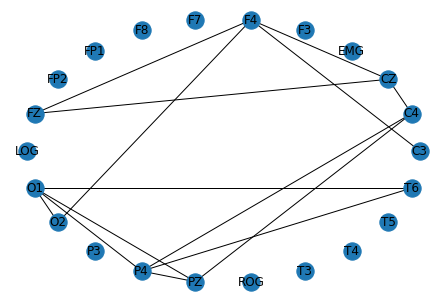

In [1]:
plt.figure(1, figsize=(12, 12))
pos = nx.circular_layout(G)
edges = G.edges()
weights = [G[u][v]['weight'] for u,v in edges]
nx.draw(G, pos, edge_color=weights, with_labels=True, edge_cmap=plt.cm.Blues)

Números entre 0 y 1.



In [1]:
import numpy as np

In [1]:
the_graphs = {par:return_selected_graph(G,par) for par in np.linspace(0,1,101)}

In [1]:
from pycliques.simplicial import *
from pycliques.dominated import *

### Con la desigualdad al otro sentido



In [1]:
the_graphs = {par:return_selected_graph(G, par, bigger_than=False) for par in np.linspace(0, 1, 101)}

In [1]:
cp_graphs = {par: completely_pared_graph(the_graphs[par]) for par in np.linspace(0,1,101)}
{par: cp_graphs[par].size() for par in np.linspace(0,1,101)}

In [1]:
g04 = return_selected_graph(G, 0.04, bigger_than=False)
g05 = return_selected_graph(G, 0.05, bigger_than=False)
g06 = return_selected_graph(G, 0.06, bigger_than=False)
nx.draw_circular(g04, with_labels=True)

In [1]:
cpg04 = completely_pared_graph(g04)
nx.draw(cpg04, with_labels=True)

In [1]:
cpg05 = completely_pared_graph(g05)
nx.draw(cpg05, with_labels=True)

In [1]:
cpg06 = completely_pared_graph(g06)
nx.draw(cpg06, with_labels=True)